In [25]:
import pandas as pd
import glob

def load_folder_csvs(folder_path):
    files = sorted(glob.glob(folder_path + "/*.csv"))
    print(f"\nFolder: {folder_path}")
    print("Files found:", len(files))
    for f in files:
        print(" -", f)
    df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
    return df

df_bio = load_folder_csvs("../data/raw/api_data_aadhar_biometric")
df_demo = load_folder_csvs("../data/raw/api_data_aadhar_demographic")
df_enrol = load_folder_csvs("../data/raw/api_data_aadhar_enrolment")

print("\nFinal Shapes:")
print("Biometric:", df_bio.shape)
print("Demographic:", df_demo.shape)
print("Enrolment:", df_enrol.shape)



Folder: ../data/raw/api_data_aadhar_biometric
Files found: 4
 - ../data/raw/api_data_aadhar_biometric\api_data_aadhar_biometric_0_500000.csv
 - ../data/raw/api_data_aadhar_biometric\api_data_aadhar_biometric_1000000_1500000.csv
 - ../data/raw/api_data_aadhar_biometric\api_data_aadhar_biometric_1500000_1861108.csv
 - ../data/raw/api_data_aadhar_biometric\api_data_aadhar_biometric_500000_1000000.csv

Folder: ../data/raw/api_data_aadhar_demographic
Files found: 5
 - ../data/raw/api_data_aadhar_demographic\api_data_aadhar_demographic_0_500000.csv
 - ../data/raw/api_data_aadhar_demographic\api_data_aadhar_demographic_1000000_1500000.csv
 - ../data/raw/api_data_aadhar_demographic\api_data_aadhar_demographic_1500000_2000000.csv
 - ../data/raw/api_data_aadhar_demographic\api_data_aadhar_demographic_2000000_2071700.csv
 - ../data/raw/api_data_aadhar_demographic\api_data_aadhar_demographic_500000_1000000.csv

Folder: ../data/raw/api_data_aadhar_enrolment
Files found: 3
 - ../data/raw/api_data_a

In [26]:
print("\nBiometric columns:", list(df_bio.columns))
print("\nDemographic columns:", list(df_demo.columns))
print("\nEnrolment columns:", list(df_enrol.columns))

display(df_bio.head())
display(df_demo.head())
display(df_enrol.head())



Biometric columns: ['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']

Demographic columns: ['date', 'state', 'district', 'pincode', 'demo_age_5_17', 'demo_age_17_']

Enrolment columns: ['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17', 'age_18_greater']


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [27]:
print("\nMissing values (Biometric):\n", df_bio.isnull().sum())
print("\nMissing values (Demographic):\n", df_demo.isnull().sum())
print("\nMissing values (Enrolment):\n", df_enrol.isnull().sum())



Missing values (Biometric):
 date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

Missing values (Demographic):
 date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64

Missing values (Enrolment):
 date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64


In [28]:
for df in [df_bio, df_demo, df_enrol]:
    df["date"] = pd.to_datetime(df["date"], format="%d-%m-%Y", errors="coerce")
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["day"] = df["date"].dt.day
    df["day_name"] = df["date"].dt.day_name()

print(df_bio["date"].min(), "to", df_bio["date"].max())
print(df_demo["date"].min(), "to", df_demo["date"].max())
print(df_enrol["date"].min(), "to", df_enrol["date"].max())


2025-03-01 00:00:00 to 2025-12-29 00:00:00
2025-03-01 00:00:00 to 2025-12-29 00:00:00
2025-03-02 00:00:00 to 2025-12-31 00:00:00


In [29]:
df_bio["bio_total"] = df_bio["bio_age_5_17"] + df_bio["bio_age_17_"]
df_demo["demo_total"] = df_demo["demo_age_5_17"] + df_demo["demo_age_17_"]
df_enrol["enrol_total"] = df_enrol["age_0_5"] + df_enrol["age_5_17"] + df_enrol["age_18_greater"]

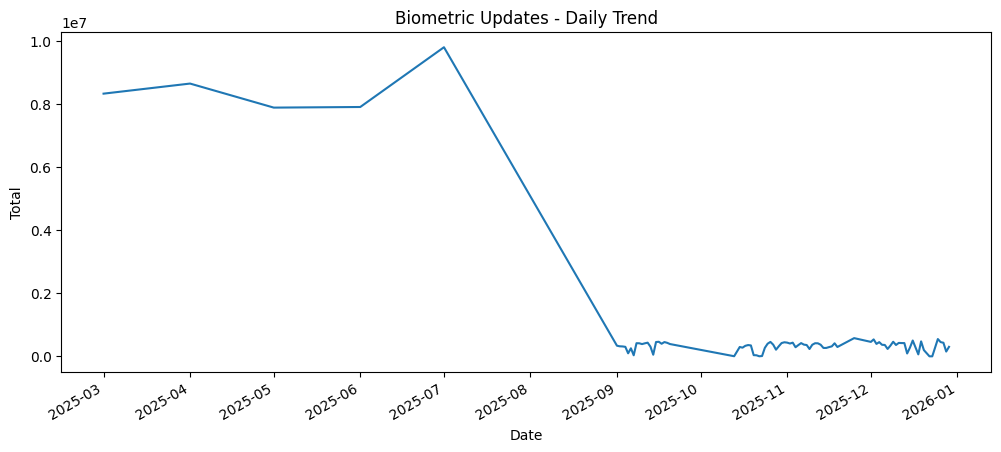

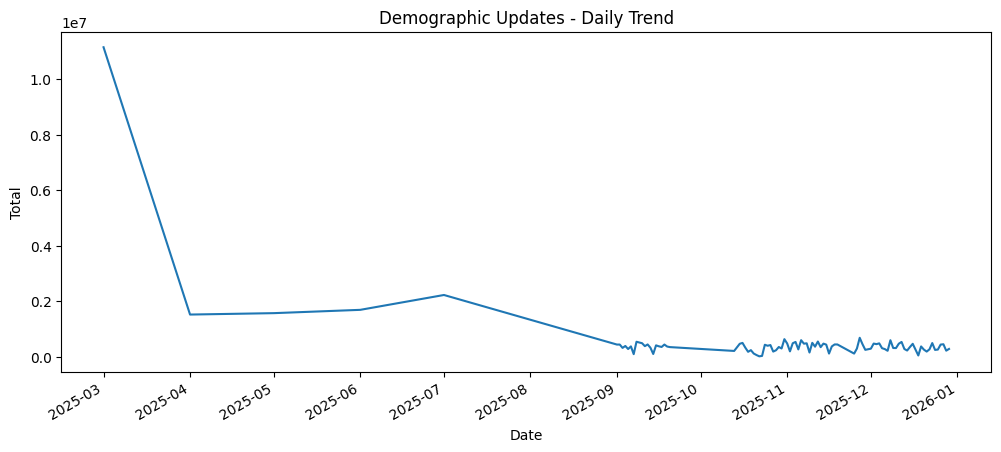

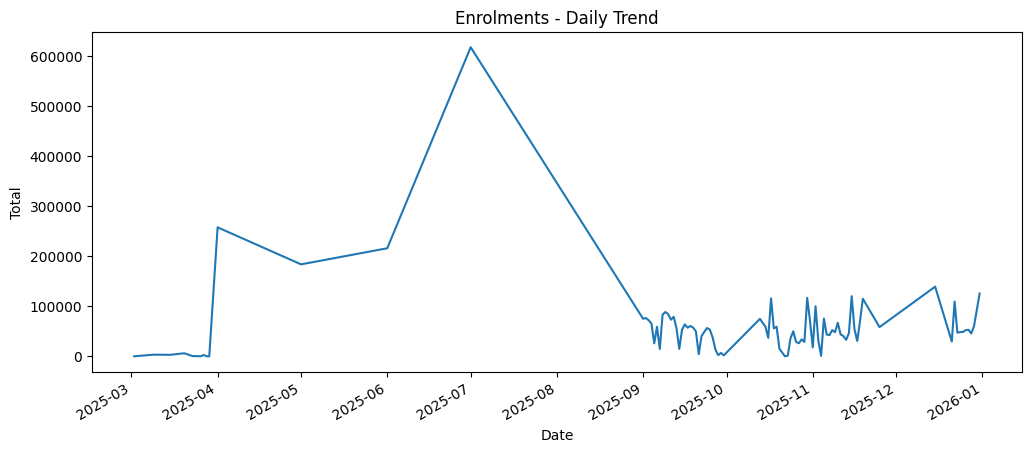

In [30]:
import matplotlib.pyplot as plt

bio_daily = df_bio.groupby("date")["bio_total"].sum()
demo_daily = df_demo.groupby("date")["demo_total"].sum()
enrol_daily = df_enrol.groupby("date")["enrol_total"].sum()

plt.figure(figsize=(12,5))
bio_daily.plot()
plt.title("Biometric Updates - Daily Trend")
plt.xlabel("Date")
plt.ylabel("Total")
plt.show()

plt.figure(figsize=(12,5))
demo_daily.plot()
plt.title("Demographic Updates - Daily Trend")
plt.xlabel("Date")
plt.ylabel("Total")
plt.show()

plt.figure(figsize=(12,5))
enrol_daily.plot()
plt.title("Enrolments - Daily Trend")
plt.xlabel("Date")
plt.ylabel("Total")
plt.show()


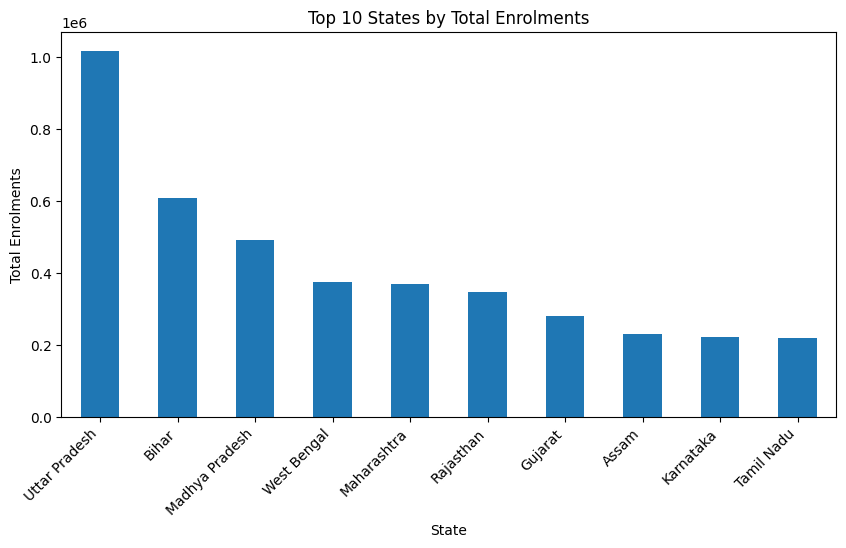

In [31]:
top_bio_states = df_bio.groupby("state")["bio_total"].sum().sort_values(ascending=False).head(10)
top_demo_states = df_demo.groupby("state")["demo_total"].sum().sort_values(ascending=False).head(10)
top_enrol_states = df_enrol.groupby("state")["enrol_total"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_enrol_states.plot(kind="bar")
plt.title("Top 10 States by Total Enrolments")
plt.xlabel("State")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45, ha="right")
plt.show()


In [32]:
def clean_state_name(x):
    return str(x).strip().title()

for df in [df_bio, df_demo, df_enrol]:
    df["state"] = df["state"].apply(clean_state_name)


In [33]:
df_merged = df_enrol.merge(
    df_bio[["date","state","district","pincode","bio_total"]],
    on=["date","state","district","pincode"],
    how="left"
).merge(
    df_demo[["date","state","district","pincode","demo_total"]],
    on=["date","state","district","pincode"],
    how="left"
)

print(df_merged.shape)
df_merged.head()


(1250497, 14)


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,year,month,day,day_name,enrol_total,bio_total,demo_total
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,2025,3,2,Sunday,109,NaN,NaN
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,2025,3,9,Sunday,86,NaN,NaN
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,2025,3,9,Sunday,123,NaN,NaN
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,2025,3,9,Sunday,106,NaN,NaN
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,2025,3,9,Sunday,51,NaN,NaN


In [34]:
corr = df_merged[["enrol_total", "bio_total", "demo_total"]].corr()
print(corr)


             enrol_total  bio_total  demo_total
enrol_total     1.000000   0.826529    0.866067
bio_total       0.826529   1.000000    0.857909
demo_total      0.866067   0.857909    1.000000


In [47]:
df_merged["bio_total"] = df_merged["bio_total"].fillna(0)
df_merged["demo_total"] = df_merged["demo_total"].fillna(0)

df_merged[["bio_total", "demo_total"]].isna().sum()
df_enrol = df_enrol[df_enrol["state"] != "100000"]
df_bio   = df_bio[df_bio["state"] != "100000"]
df_demo  = df_demo[df_demo["state"] != "100000"]


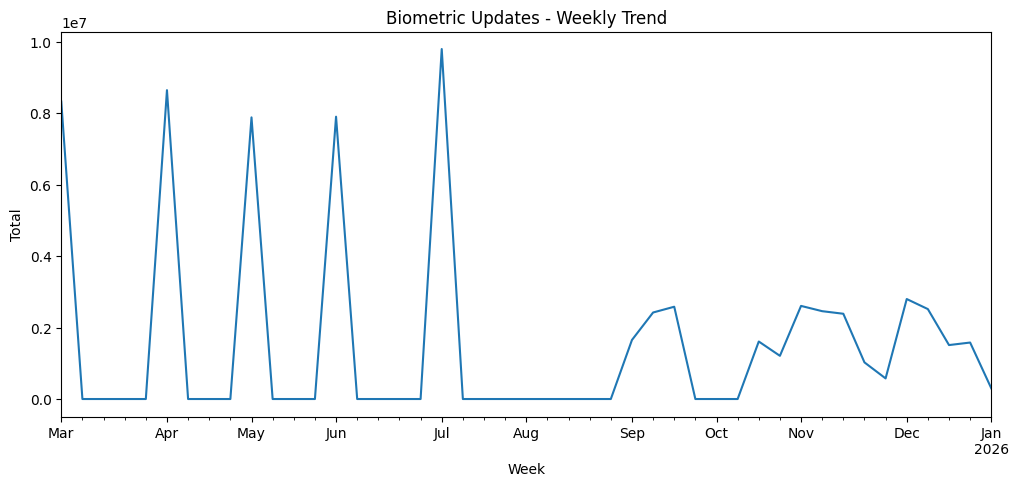

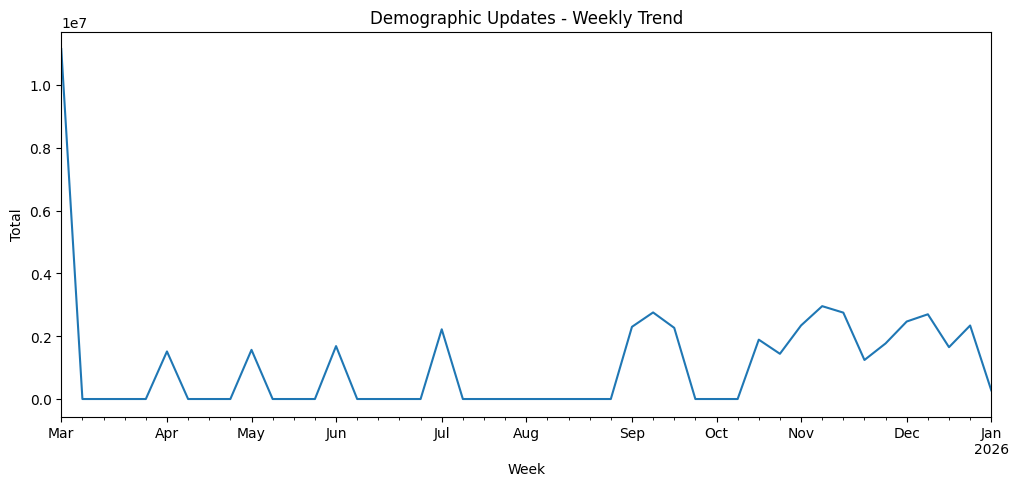

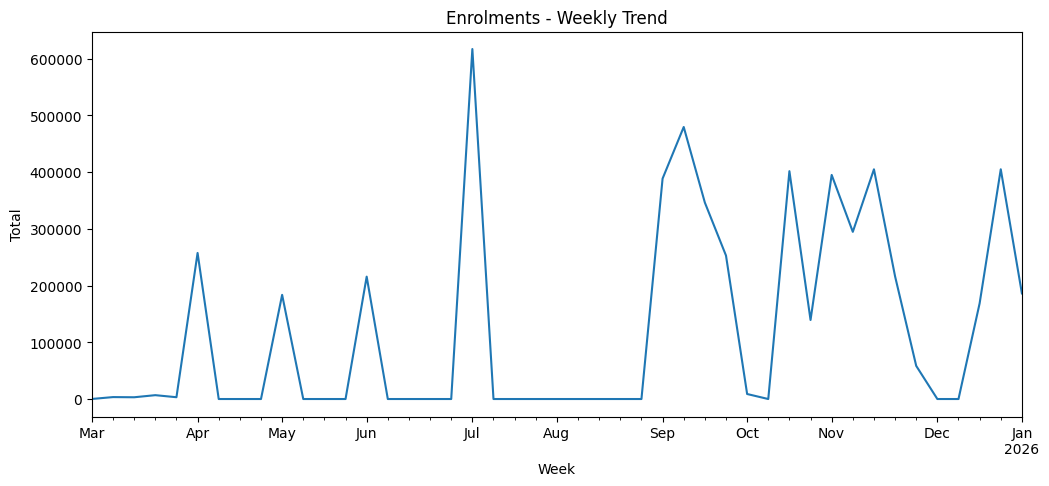

In [36]:
bio_weekly = df_bio.groupby(pd.Grouper(key="date", freq="W"))["bio_total"].sum()
demo_weekly = df_demo.groupby(pd.Grouper(key="date", freq="W"))["demo_total"].sum()
enrol_weekly = df_enrol.groupby(pd.Grouper(key="date", freq="W"))["enrol_total"].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
bio_weekly.plot()
plt.title("Biometric Updates - Weekly Trend")
plt.xlabel("Week")
plt.ylabel("Total")
plt.show()

plt.figure(figsize=(12,5))
demo_weekly.plot()
plt.title("Demographic Updates - Weekly Trend")
plt.xlabel("Week")
plt.ylabel("Total")
plt.show()

plt.figure(figsize=(12,5))
enrol_weekly.plot()
plt.title("Enrolments - Weekly Trend")
plt.xlabel("Week")
plt.ylabel("Total")
plt.show()


In [37]:
daily = pd.DataFrame({
    "bio_total": df_bio.groupby("date")["bio_total"].sum(),
    "demo_total": df_demo.groupby("date")["demo_total"].sum(),
    "enrol_total": df_enrol.groupby("date")["enrol_total"].sum()
}).fillna(0)

daily["bio_pct_change"] = daily["bio_total"].pct_change() * 100
daily["demo_pct_change"] = daily["demo_total"].pct_change() * 100
daily["enrol_pct_change"] = daily["enrol_total"].pct_change() * 100

# Find big drops (threshold can be tuned)
bio_drops = daily[daily["bio_pct_change"] < -50].sort_values("bio_pct_change").head(10)
demo_drops = daily[daily["demo_pct_change"] < -50].sort_values("demo_pct_change").head(10)

print("Top Biometric Drops:")
display(bio_drops)

print("Top Demographic Drops:")
display(demo_drops)


Top Biometric Drops:


,bio_total,demo_total,enrol_total,bio_pct_change,demo_pct_change,enrol_pct_change
date,,,,,,
2025-03-02,0.0,0.0,109.0,-100.000000,-100.000000,inf
2025-09-21,0.0,0.0,4400.0,-100.000000,-100.000000,-91.088969
2025-12-31,0.0,0.0,125436.0,-100.000000,-100.000000,106.676333
2025-11-26,0.0,292015.0,0.0,-100.000000,166.602454,-100.000000
2025-12-21,0.0,181831.0,29602.0,-100.000000,-28.036458,inf
2025-12-24,0.0,242245.0,48459.0,-100.000000,-50.406379,2.391869
2025-09-01,336459.0,434325.0,74989.0,-96.564134,-80.442110,-87.843591
2025-10-22,1681.0,10448.0,233.0,-94.968120,-81.794738,-96.951459
2025-10-20,37356.0,112017.0,15405.0,-89.185214,-51.994086,-73.877433


Top Demographic Drops:


,bio_total,demo_total,enrol_total,bio_pct_change,demo_pct_change,enrol_pct_change
date,,,,,,
2025-03-02,0.0,0.0,109.0,-100.000000,-100.000000,inf
2025-09-21,0.0,0.0,4400.0,-100.000000,-100.000000,-91.088969
2025-12-31,0.0,0.0,125436.0,-100.000000,-100.000000,106.676333
2025-12-18,62110.0,41401.0,0.0,-87.606456,-91.039850,NaN
2025-10-22,1681.0,10448.0,233.0,-94.968120,-81.794738,-96.951459
2025-09-01,336459.0,434325.0,74989.0,-96.564134,-80.442110,-87.843591
2025-09-07,32956.0,89031.0,14658.0,-87.050128,-75.822561,-75.137812
2025-11-25,576777.0,109532.0,58406.0,94.855778,-74.988982,-49.226302
2025-11-16,292454.0,110125.0,53956.0,10.115253,-74.565682,-55.070738


In [38]:
state_month = df_enrol.pivot_table(
    index="state",
    columns="month",
    values="enrol_total",
    aggfunc="sum",
    fill_value=0
)

top_states = df_enrol.groupby("state")["enrol_total"].sum().sort_values(ascending=False).head(10).index
display(state_month.loc[top_states])


month,3,4,5,6,7,9,10,11,12
state,,,,,,,,,
Uttar Pradesh,5393,57903,49861,48753,157866,261079,138152,182695,116927
Bihar,2352,29442,31651,46386,59274,143565,100909,105624,90382
Madhya Pradesh,542,17351,10603,18154,63188,132517,63625,103539,84451
West Bengal,121,4268,9582,7271,28544,119639,77887,79231,48765
Maharashtra,460,10591,9849,10649,54767,102341,51005,71886,57591
Rajasthan,94,16842,2961,6616,28786,123584,43918,74352,51305
Gujarat,1322,27846,14294,12224,60833,60564,21620,49834,32012
Assam,2492,25654,13197,9734,47873,50639,27623,31998,20987
Karnataka,732,9586,5491,11685,15263,58373,36053,47260,38792


In [39]:
import numpy as np

daily.replace([np.inf, -np.inf], np.nan, inplace=True)


In [40]:
state_enrol = df_enrol.groupby("state")["enrol_total"].sum()
state_bio = df_bio.groupby("state")["bio_total"].sum()
state_demo = df_demo.groupby("state")["demo_total"].sum()

state_summary = pd.DataFrame({
    "enrol_total": state_enrol,
    "bio_total": state_bio,
    "demo_total": state_demo
}).fillna(0)

state_summary["bio_per_enrol"] = state_summary["bio_total"] / (state_summary["enrol_total"] + 1)
state_summary["demo_per_enrol"] = state_summary["demo_total"] / (state_summary["enrol_total"] + 1)

state_summary.sort_values("demo_per_enrol", ascending=False).head(10)


,enrol_total,bio_total,demo_total,bio_per_enrol,demo_per_enrol
state,,,,,
Chandigarh,2723.0,74482.0,83361.0,27.342878,30.602423
Daman & Diu,21.0,2185.0,644.0,99.318182,29.272727
Manipur,13456.0,282587.0,301549.0,20.999257,22.408338
Dadra And Nagar Haveli And Daman And Diu,173.0,2532.0,3740.0,14.551724,21.494253
Chhattisgarh,103219.0,2648729.0,2005434.0,25.661006,19.428735
Westbengal,7.0,31.0,152.0,3.875000,19.000000
Andhra Pradesh,127686.0,3714633.0,2295582.0,29.091709,17.978197
Andaman And Nicobar Islands,397.0,18314.0,6187.0,46.015075,15.545226
Delhi,94529.0,1304362.0,1438934.0,13.798392,15.221982


In [41]:
df_enrol["week"] = df_enrol["date"].dt.to_period("W").astype(str)

weekly_state = df_enrol.groupby(["week", "state"])["enrol_total"].sum().reset_index()

# Find top spike weeks overall
weekly_total = df_enrol.groupby("week")["enrol_total"].sum().sort_values(ascending=False).head(5)
print("Top 5 enrolment spike weeks:")
print(weekly_total)

# For the highest spike week, show top states
top_week = weekly_total.index[0]
weekly_state[weekly_state["week"] == top_week].sort_values("enrol_total", ascending=False).head(10)


Top 5 enrolment spike weeks:
week
2025-06-30/2025-07-06    616868
2025-09-08/2025-09-14    479446
2025-12-22/2025-12-28    404880
2025-11-10/2025-11-16    404872
2025-10-13/2025-10-19    401575
Name: enrol_total, dtype: int64


,week,state,enrol_total
139,2025-06-30/2025-07-06,Uttar Pradesh,157866
125,2025-06-30/2025-07-06,Madhya Pradesh,63188
118,2025-06-30/2025-07-06,Gujarat,60833
114,2025-06-30/2025-07-06,Bihar,59274
126,2025-06-30/2025-07-06,Maharashtra,54767
113,2025-06-30/2025-07-06,Assam,47873
133,2025-06-30/2025-07-06,Rajasthan,28786
141,2025-06-30/2025-07-06,West Bengal,28544
128,2025-06-30/2025-07-06,Meghalaya,23909
116,2025-06-30/2025-07-06,Delhi,18784


In [42]:
weekly_series = df_enrol.groupby(pd.Grouper(key="date", freq="W"))["enrol_total"].sum()
weekly_series = weekly_series.asfreq("W").fillna(0)
weekly_series.tail()


date
2025-12-07         0
2025-12-14         0
2025-12-21    168650
2025-12-28    404880
2026-01-04    186128
Freq: W-SUN, Name: enrol_total, dtype: int64

In [43]:
forecast = weekly_series.rolling(4).mean().iloc[-1]
print("Next week forecast (baseline):", forecast)


Next week forecast (baseline): 189914.5


In [44]:
states = sorted(df_enrol["state"].dropna().unique())
print("Total States:", len(states))
print(states)


Total States: 49
['100000', 'Andaman & Nicobar Islands', 'Andaman And Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli', 'Dadra And Nagar Haveli', 'Dadra And Nagar Haveli And Daman And Diu', 'Daman & Diu', 'Daman And Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jammu And Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Orissa', 'Pondicherry', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'The Dadra And Nagar Haveli And Daman And Diu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West  Bengal', 'West Bangal', 'West Bengal', 'Westbengal']


In [45]:
districts = sorted(df_enrol["district"].dropna().unique())
print("Total Districts:", len(districts))
print(districts)


Total Districts: 985
['100000', '24 Paraganas North', '24 Paraganas South', 'ANGUL', 'ANUGUL', 'Adilabad', 'Agar Malwa', 'Agra', 'Ahilyanagar', 'Ahmadabad', 'Ahmadnagar', 'Ahmed Nagar', 'Ahmedabad', 'Ahmednagar', 'Aizawl', 'Ajmer', 'Akola', 'Alappuzha', 'Aligarh', 'Alipurduar', 'Alirajpur', 'Allahabad', 'Alluri Sitharama Raju', 'Almora', 'Alwar', 'Ambala', 'Ambedkar Nagar', 'Amethi', 'Amravati', 'Amreli', 'Amritsar', 'Amroha', 'Anakapalli', 'Anand', 'Anantapur', 'Ananthapur', 'Ananthapuramu', 'Anantnag', 'Andamans', 'Angul', 'Anjaw', 'Annamayya', 'Anugal', 'Anugul', 'Anuppur', 'Araria', 'Ariyalur', 'Arvalli', 'Arwal', 'Ashok Nagar', 'Ashoknagar', 'Auraiya', 'Aurangabad', 'Aurangabad(BH)', 'Aurangabad(bh)', 'Ayodhya', 'Azamgarh', 'Badgam', 'Bagalkot', 'Bagalkot *', 'Bageshwar', 'Baghpat', 'Bagpat', 'Bahraich', 'Bajali', 'Baksa', 'Balaghat', 'Balangir', 'Baleshwar', 'Baleswar', 'Ballari', 'Ballia', 'Balod', 'Baloda Bazar', 'Balotra', 'Balrampur', 'Banas Kantha', 'Banaskantha', 'Banda', '

In [46]:
state_district_map = (
    df_enrol.groupby("state")["district"]
    .unique()
    .apply(lambda x: sorted(x))
)

print("Total States:", len(state_district_map))
state_district_map.head()


Total States: 49


state
100000                                                                  [100000]
Andaman & Nicobar Islands                    [Andamans, Nicobars, South Andaman]
Andaman And Nicobar Islands    [Nicobar, North And Middle Andaman, South Anda...
Andhra Pradesh                 [Adilabad, Alluri Sitharama Raju, Anakapalli, ...
Arunachal Pradesh              [Anjaw, Changlang, Dibang Valley, East Kameng,...
Name: district, dtype: object

In [48]:
import re

def clean_text(x):
    x = str(x).strip()
    x = re.sub(r"\s+", " ", x)   # remove extra spaces
    return x

# Clean basic formatting
for df in [df_enrol, df_bio, df_demo]:
    df["state"] = df["state"].apply(clean_text)
    df["district"] = df["district"].apply(clean_text)

# Remove invalid state rows
invalid_states = ["100000", "0", "nan", "None"]
for df in [df_enrol, df_bio, df_demo]:
    df.drop(df[df["state"].isin(invalid_states)].index, inplace=True)

# Standardize state names using mapping
state_map = {
    "Andaman And Nicobar Islands": "Andaman & Nicobar Islands",
    "Jammu And Kashmir": "Jammu & Kashmir",
    "Daman And Diu": "Daman & Diu",
    "Dadra And Nagar Haveli": "Dadra & Nagar Haveli",
    "Dadra And Nagar Haveli And Daman And Diu": "Dadra & Nagar Haveli And Daman & Diu",
    "The Dadra And Nagar Haveli And Daman And Diu": "Dadra & Nagar Haveli And Daman & Diu",
    "Pondicherry": "Puducherry",
    "Orissa": "Odisha",
    "West  Bengal": "West Bengal",
    "West Bangal": "West Bengal",
    "Westbengal": "West Bengal",
    "WESTBENGAL": "West Bengal",
    "ODISHA": "Odisha"
}

for df in [df_enrol, df_bio, df_demo]:
    df["state"] = df["state"].replace(state_map)


In [49]:
states_clean = sorted(df_enrol["state"].unique())
print("Total States after cleaning:", len(states_clean))
print(states_clean)


Total States after cleaning: 38
['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra & Nagar Haveli', 'Dadra & Nagar Haveli And Daman & Diu', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']


In [50]:
df_enrol["enrol_total"] = df_enrol["age_0_5"] + df_enrol["age_5_17"] + df_enrol["age_18_greater"]
df_bio["bio_total"] = df_bio["bio_age_5_17"] + df_bio["bio_age_17_"]
df_demo["demo_total"] = df_demo["demo_age_5_17"] + df_demo["demo_age_17_"]

top10_clean = df_enrol.groupby("state")["enrol_total"].sum().sort_values(ascending=False).head(10)
print(top10_clean)


state
Uttar Pradesh     1018629
Bihar              609585
Madhya Pradesh     493970
West Bengal        375340
Maharashtra        369139
Rajasthan          348458
Gujarat            280549
Assam              230197
Karnataka          223235
Tamil Nadu         220789
Name: enrol_total, dtype: int64


In [51]:
df_enrol["week"] = df_enrol["date"].dt.to_period("W").astype(str)

weekly_total = df_enrol.groupby("week")["enrol_total"].sum().sort_values(ascending=False).head(5)
print("Top 5 spike weeks:")
print(weekly_total)

top_week = weekly_total.index[0]

top_states_week = (
    df_enrol[df_enrol["week"] == top_week]
    .groupby("state")["enrol_total"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("\nTop 10 states in top spike week:", top_week)
print(top_states_week)


Top 5 spike weeks:
week
2025-06-30/2025-07-06    616868
2025-09-08/2025-09-14    479440
2025-11-10/2025-11-16    404867
2025-12-22/2025-12-28    404859
2025-10-13/2025-10-19    401575
Name: enrol_total, dtype: int64

Top 10 states in top spike week: 2025-06-30/2025-07-06
state
Uttar Pradesh     157866
Madhya Pradesh     63188
Gujarat            60833
Bihar              59274
Maharashtra        54767
Assam              47873
Rajasthan          28786
West Bengal        28544
Meghalaya          23909
Delhi              18784
Name: enrol_total, dtype: int64


In [52]:
state_summary = pd.DataFrame({
    "enrol_total": df_enrol.groupby("state")["enrol_total"].sum(),
    "bio_total": df_bio.groupby("state")["bio_total"].sum(),
    "demo_total": df_demo.groupby("state")["demo_total"].sum()
}).fillna(0)

state_summary["bio_per_enrol"] = state_summary["bio_total"] / (state_summary["enrol_total"] + 1)
state_summary["demo_per_enrol"] = state_summary["demo_total"] / (state_summary["enrol_total"] + 1)

display(state_summary.sort_values("demo_per_enrol", ascending=False).head(10))


,enrol_total,bio_total,demo_total,bio_per_enrol,demo_per_enrol
state,,,,,
Chandigarh,2723.0,74482.0,83361.0,27.342878,30.602423
Manipur,13456.0,282587.0,301549.0,20.999257,22.408338
Chhattisgarh,103219.0,2648729.0,2005434.0,25.661006,19.428735
Andhra Pradesh,127686.0,3714633.0,2295582.0,29.091709,17.978197
Daman & Diu,141.0,8948.0,2196.0,63.014085,15.464789
Delhi,94529.0,1304362.0,1438934.0,13.798392,15.221982
Goa,2333.0,68397.0,35120.0,29.304627,15.047129
Andaman & Nicobar Islands,511.0,20698.0,7246.0,40.425781,14.152344
Maharashtra,369139.0,9226139.0,5054602.0,24.993604,13.692913


In [53]:
import re

def clean_district(x):
    x = str(x).strip()
    x = re.sub(r"\s+", " ", x)          # remove extra spaces
    x = re.sub(r"\*", "", x)            # remove * marks
    x = x.replace("\xa0", "")           # remove hidden spaces
    return x.title()

for df in [df_enrol, df_bio, df_demo]:
    df["district"] = df["district"].apply(clean_district)


In [54]:
districts = sorted(df_enrol["district"].unique())
print("Total Districts after cleaning:", len(districts))


Total Districts after cleaning: 963


In [55]:
df_enrol["district_raw"] = df_enrol["district"]

# show suspicious duplicates by comparing lowercase
dupes = (
    df_enrol.assign(district_lower=df_enrol["district"].str.lower())
    .groupby("district_lower")["district"]
    .nunique()
    .sort_values(ascending=False)
)

print("Districts with multiple spellings:", (dupes > 1).sum())


Districts with multiple spellings: 0


In [56]:
district_map = {
    "Anugul": "Angul",
    "Anugal": "Angul",
    "Haora": "Howrah",
    "Hawrah": "Howrah",
    "Hugli": "Hooghly",
    "Hooghiy": "Hooghly",
}

for df in [df_enrol, df_bio, df_demo]:
    df["district"] = df["district"].replace(district_map)


In [57]:
district_state_count = df_enrol.groupby("district")["state"].nunique().sort_values(ascending=False)
print(district_state_count.head(20))


district
Dadra And Nagar Haveli    2
Adilabad                  2
Aurangabad                2
Diu                       2
Khammam                   2
Bilaspur                  2
Hyderabad                 2
Kargil                    2
Daman                     2
K.V. Rangareddy           2
Balrampur                 2
Nalgonda                  2
Hamirpur                  2
Karimnagar                2
Kamrup                    2
Bijapur                   2
Leh                       2
Mahabubnagar              2
Medak                     2
Nizamabad                 2
Name: state, dtype: int64


In [58]:
for df in [df_enrol, df_bio, df_demo]:
    df["state_district"] = df["state"] + " - " + df["district"]


In [59]:
top_districts = df_enrol.groupby("state_district")["enrol_total"].sum().sort_values(ascending=False).head(15)
top_districts


state_district
Maharashtra - Thane                43688
Bihar - Sitamarhi                  42232
Uttar Pradesh - Bahraich           39338
West Bengal - Murshidabad          35911
West Bengal - South 24 Parganas    33542
Maharashtra - Pune                 31763
Rajasthan - Jaipur                 31146
Karnataka - Bengaluru              30980
Uttar Pradesh - Sitapur            30854
Bihar - West Champaran             30438
Uttar Pradesh - Agra               29910
Bihar - East Champaran             29323
Bihar - Muzaffarpur                28855
Meghalaya - East Khasi Hills       28812
West Bengal - North 24 Parganas    28606
Name: enrol_total, dtype: int64

In [61]:
df_demo.groupby("state_district")["demo_total"].sum().sort_values(ascending=False).head(15)



state_district
Maharashtra - Thane                447253
Maharashtra - Pune                 438478
West Bengal - South 24 Parganas    401200
West Bengal - Murshidabad          371953
Gujarat - Surat                    357582
Delhi - North West Delhi           313989
Karnataka - Bengaluru              303924
West Bengal - North 24 Parganas    290477
Rajasthan - Jaipur                 275340
West Bengal - Uttar Dinajpur       270232
Gujarat - Ahmedabad                267884
Maharashtra - Solapur              265546
Bihar - East Champaran             248028
Maharashtra - Nashik               246100
Bihar - Patna                      243772
Name: demo_total, dtype: int64

In [62]:
df_bio.groupby("state_district")["bio_total"].sum().sort_values(ascending=False).head(15)


state_district
Maharashtra - Pune          605762
Maharashtra - Nashik        576606
Maharashtra - Thane         571273
Maharashtra - Jalgaon       417384
Gujarat - Ahmedabad         405490
Maharashtra - Mumbai        404359
Maharashtra - Ahmadnagar    363561
Rajasthan - Jaipur          355884
Maharashtra - Nagpur        350923
Andhra Pradesh - Kurnool    350633
Maharashtra - Nanded        342540
Maharashtra - Amravati      338283
Maharashtra - Solapur       334507
Maharashtra - Yavatmal      327187
Delhi - North West Delhi    325293
Name: bio_total, dtype: int64

In [64]:
df_merged["state_district"] = df_merged["state"] + " - " + df_merged["district"]

district_summary = df_merged.groupby("state_district")[["enrol_total", "demo_total", "bio_total"]].sum()

# Normalize each metric (0 to 1 scale)
district_summary_norm = (district_summary - district_summary.min()) / (district_summary.max() - district_summary.min())

district_summary_norm["hotspot_score"] = (
    0.4 * district_summary_norm["enrol_total"] +
    0.3 * district_summary_norm["demo_total"] +
    0.3 * district_summary_norm["bio_total"]
)

top_hotspots = district_summary_norm.sort_values("hotspot_score", ascending=False).head(15)
top_hotspots


,enrol_total,demo_total,bio_total,hotspot_score
state_district,,,,
Maharashtra - Thane,1.000000,1.000000,1.000000,1.000000
Maharashtra - Pune,0.714175,0.737184,0.682178,0.711479
West Bengal - South 24 Parganas,0.771186,0.787018,0.251601,0.620060
West Bengal - Murshidabad,0.824961,0.691674,0.247649,0.611781
Maharashtra - Nashik,0.504736,0.519527,0.756066,0.584572
Gujarat - Surat,0.593397,0.691994,0.425137,0.572498
Rajasthan - Jaipur,0.707813,0.448541,0.482224,0.562355
Bihar - Sitamarhi,0.849512,0.388244,0.306859,0.548336
Karnataka - Bengaluru,0.686695,0.472978,0.367708,0.526884


In [65]:
district_summary_real = df_merged.groupby("state_district")[["enrol_total","demo_total","bio_total"]].sum()
district_summary_real = district_summary_real.sort_values("enrol_total", ascending=False)

district_summary_real.loc[top_hotspots.index].sort_values("enrol_total", ascending=False)


,enrol_total,demo_total,bio_total
state_district,,,
Maharashtra - Thane,55640,256050.0,337308.0
Bihar - Sitamarhi,47267,99410.0,103506.0
West Bengal - Murshidabad,45901,177103.0,83534.0
Uttar Pradesh - Bahraich,43426,71934.0,121297.0
West Bengal - South 24 Parganas,42909,201516.0,84867.0
Maharashtra - Pune,39737,188756.0,230104.0
Rajasthan - Jaipur,39383,114849.0,162658.0
Karnataka - Bengaluru,38208,121106.0,124031.0
West Bengal - North 24 Parganas,36074,144976.0,74220.0


In [66]:
df_merged["week"] = df_merged["date"].dt.to_period("W").astype(str)

weekly_district = df_merged.groupby(["week","state_district"])[["enrol_total","demo_total","bio_total"]].sum().reset_index()

weekly_district["enrol_pct_change"] = weekly_district.groupby("state_district")["enrol_total"].pct_change() * 100

weekly_district.sort_values("enrol_pct_change", ascending=False).head(15)


,week,state_district,enrol_total,demo_total,bio_total,enrol_pct_change
5832,2025-10-13/2025-10-19,Bihar - Banka,1996,6527.0,2733.0,199500.000000
6674,2025-10-13/2025-10-19,West Bengal - Purba Medinipur,2163,3351.0,4764.0,108050.000000
6041,2025-10-13/2025-10-19,Jharkhand - Deoghar,1051,2784.0,2286.0,105000.000000
6318,2025-10-13/2025-10-19,Odisha - Jagatsinghapur,933,433.0,1655.0,93200.000000
6333,2025-10-13/2025-10-19,Odisha - Nabarangapur,891,2040.0,2737.0,89000.000000
6654,2025-10-13/2025-10-19,West Bengal - Howrah,1709,3952.0,3024.0,85350.000000
6663,2025-10-13/2025-10-19,West Bengal - Malda,2538,9304.0,3746.0,84500.000000
5842,2025-10-13/2025-10-19,Bihar - Jamui,1561,4213.0,2116.0,77950.000000
6040,2025-10-13/2025-10-19,Jharkhand - Chatra,670,1976.0,1655.0,66900.000000
6676,2025-10-13/2025-10-19,West Bengal - Puruliya,1906,5179.0,3292.0,63433.333333


In [68]:
import pandas as pd

# Ensure date is datetime
df_merged["date"] = pd.to_datetime(df_merged["date"])

# Create a weekly column (Mon–Sun weekly buckets)
df_merged["week"] = df_merged["date"].dt.to_period("W").astype(str)

# Weekly aggregation per district
df_weekly = df_merged.groupby(["week", "state_district"], as_index=False)[
    ["enrol_total", "demo_total", "bio_total"]
].sum()

df_weekly.head()


,week,state_district,enrol_total,demo_total,bio_total
0,2025-02-24/2025-03-02,Meghalaya - East Khasi Hills,109,0.0,0.0
1,2025-03-03/2025-03-09,Bihar - Bhagalpur,71,0.0,0.0
2,2025-03-03/2025-03-09,Bihar - Madhubani,160,0.0,0.0
3,2025-03-03/2025-03-09,Bihar - Purbi Champaran,190,0.0,0.0
4,2025-03-03/2025-03-09,Bihar - Sitamarhi,584,0.0,0.0


In [70]:
weekly = df_weekly.copy()

weekly["prev_enrol"] = weekly.groupby("state_district")["enrol_total"].shift(1)

weekly["enrol_pct_change"] = (
    (weekly["enrol_total"] - weekly["prev_enrol"]) / weekly["prev_enrol"]
) * 100

weekly.head()


,week,state_district,enrol_total,demo_total,bio_total,prev_enrol,enrol_pct_change
0,2025-02-24/2025-03-02,Meghalaya - East Khasi Hills,109,0.0,0.0,NaN,NaN
1,2025-03-03/2025-03-09,Bihar - Bhagalpur,71,0.0,0.0,NaN,NaN
2,2025-03-03/2025-03-09,Bihar - Madhubani,160,0.0,0.0,NaN,NaN
3,2025-03-03/2025-03-09,Bihar - Purbi Champaran,190,0.0,0.0,NaN,NaN
4,2025-03-03/2025-03-09,Bihar - Sitamarhi,584,0.0,0.0,NaN,NaN


In [71]:
spikes = weekly[
    (weekly["prev_enrol"] >= 50) & (weekly["enrol_pct_change"] >= 200)
].sort_values("enrol_pct_change", ascending=False)

spikes.head(20)


,week,state_district,enrol_total,demo_total,bio_total,prev_enrol,enrol_pct_change
264,2025-03-31/2025-04-06,Meghalaya - East Khasi Hills,7798,0.0,2961.0,54.0,14340.740741
5872,2025-10-13/2025-10-19,Bihar - Vaishali,3455,9825.0,3754.0,51.0,6674.509804
6247,2025-10-13/2025-10-19,Maharashtra - Thane,3205,16225.0,19194.0,50.0,6310.000000
6238,2025-10-13/2025-10-19,Maharashtra - Pune,3374,15163.0,15520.0,61.0,5431.147541
803,2025-06-30/2025-07-06,Assam - Goalpara,4287,3998.0,2151.0,80.0,5258.750000
609,2025-05-26/2025-06-01,Bihar - Pashchim Champaran,6507,0.0,0.0,126.0,5064.285714
5853,2025-10-13/2025-10-19,Bihar - Muzaffarpur,2502,12389.0,4512.0,54.0,4533.333333
5840,2025-10-13/2025-10-19,Bihar - Gaya,3451,10373.0,3748.0,76.0,4440.789474
168,2025-03-31/2025-04-06,Delhi - West Delhi,3341,32188.0,28339.0,76.0,4296.052632
164,2025-03-31/2025-04-06,Delhi - North West Delhi,2612,27446.0,21606.0,60.0,4253.333333


In [72]:
weekly["prev_demo"] = weekly.groupby("state_district")["demo_total"].shift(1)
weekly["demo_pct_change"] = ((weekly["demo_total"] - weekly["prev_demo"]) / weekly["prev_demo"]) * 100

weekly["prev_bio"] = weekly.groupby("state_district")["bio_total"].shift(1)
weekly["bio_pct_change"] = ((weekly["bio_total"] - weekly["prev_bio"]) / weekly["prev_bio"]) * 100

spikes_all = weekly[
    (weekly["prev_enrol"] >= 50) &
    ((weekly["enrol_pct_change"] >= 200) | (weekly["demo_pct_change"] >= 200) | (weekly["bio_pct_change"] >= 200))
].sort_values(["enrol_pct_change", "demo_pct_change", "bio_pct_change"], ascending=False)

spikes_all.head(20)


,week,state_district,enrol_total,demo_total,bio_total,prev_enrol,enrol_pct_change,prev_demo,demo_pct_change,prev_bio,bio_pct_change
264,2025-03-31/2025-04-06,Meghalaya - East Khasi Hills,7798,0.0,2961.0,54.0,14340.740741,0.0,NaN,0.0,inf
5872,2025-10-13/2025-10-19,Bihar - Vaishali,3455,9825.0,3754.0,51.0,6674.509804,0.0,inf,0.0,inf
6247,2025-10-13/2025-10-19,Maharashtra - Thane,3205,16225.0,19194.0,50.0,6310.000000,0.0,inf,0.0,inf
6238,2025-10-13/2025-10-19,Maharashtra - Pune,3374,15163.0,15520.0,61.0,5431.147541,0.0,inf,0.0,inf
803,2025-06-30/2025-07-06,Assam - Goalpara,4287,3998.0,2151.0,80.0,5258.750000,0.0,inf,55.0,3810.909091
609,2025-05-26/2025-06-01,Bihar - Pashchim Champaran,6507,0.0,0.0,126.0,5064.285714,0.0,NaN,0.0,NaN
5853,2025-10-13/2025-10-19,Bihar - Muzaffarpur,2502,12389.0,4512.0,54.0,4533.333333,0.0,inf,0.0,inf
5840,2025-10-13/2025-10-19,Bihar - Gaya,3451,10373.0,3748.0,76.0,4440.789474,0.0,inf,0.0,inf
168,2025-03-31/2025-04-06,Delhi - West Delhi,3341,32188.0,28339.0,76.0,4296.052632,0.0,inf,0.0,inf
164,2025-03-31/2025-04-06,Delhi - North West Delhi,2612,27446.0,21606.0,60.0,4253.333333,0.0,inf,0.0,inf


In [73]:
weekly = df_weekly.copy()

# Previous values
weekly["prev_enrol"] = weekly.groupby("state_district")["enrol_total"].shift(1)
weekly["prev_demo"]  = weekly.groupby("state_district")["demo_total"].shift(1)
weekly["prev_bio"]   = weekly.groupby("state_district")["bio_total"].shift(1)

# Avoid division by zero (0 -> NaN)
weekly.loc[weekly["prev_enrol"] == 0, "prev_enrol"] = pd.NA
weekly.loc[weekly["prev_demo"]  == 0, "prev_demo"]  = pd.NA
weekly.loc[weekly["prev_bio"]   == 0, "prev_bio"]   = pd.NA

# % change
weekly["enrol_pct_change"] = ((weekly["enrol_total"] - weekly["prev_enrol"]) / weekly["prev_enrol"]) * 100
weekly["demo_pct_change"]  = ((weekly["demo_total"]  - weekly["prev_demo"])  / weekly["prev_demo"])  * 100
weekly["bio_pct_change"]   = ((weekly["bio_total"]   - weekly["prev_bio"])   / weekly["prev_bio"])   * 100

weekly.head()


,week,state_district,enrol_total,demo_total,bio_total,prev_enrol,prev_demo,prev_bio,enrol_pct_change,demo_pct_change,bio_pct_change
0,2025-02-24/2025-03-02,Meghalaya - East Khasi Hills,109,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-03-03/2025-03-09,Bihar - Bhagalpur,71,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-03-03/2025-03-09,Bihar - Madhubani,160,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-03-03/2025-03-09,Bihar - Purbi Champaran,190,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-03-03/2025-03-09,Bihar - Sitamarhi,584,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
spikes = weekly[
    (weekly["prev_enrol"] >= 100) &
    (weekly["enrol_pct_change"] >= 200)
].sort_values("enrol_pct_change", ascending=False)

spikes.head(20)


,week,state_district,enrol_total,demo_total,bio_total,prev_enrol,prev_demo,prev_bio,enrol_pct_change,demo_pct_change,bio_pct_change
609,2025-05-26/2025-06-01,Bihar - Pashchim Champaran,6507,0.0,0.0,126.0,NaN,NaN,5064.285714,NaN,NaN
611,2025-05-26/2025-06-01,Bihar - Purbi Champaran,6198,0.0,0.0,146.0,NaN,NaN,4145.205479,NaN,NaN
1108,2025-06-30/2025-07-06,West Bengal - Coochbehar,4255,0.0,0.0,105.0,NaN,NaN,3952.380952,NaN,NaN
967,2025-06-30/2025-07-06,Maharashtra - Nashik,5364,6931.0,21122.0,156.0,NaN,932.0,3338.461538,NaN,2166.309013
272,2025-03-31/2025-04-06,Meghalaya - West Khasi Hills,4695,0.0,905.0,137.0,NaN,NaN,3327.007299,NaN,NaN
635,2025-05-26/2025-06-01,Gujarat - Dohad,3188,0.0,1373.0,110.0,NaN,NaN,2798.181818,NaN,NaN
970,2025-06-30/2025-07-06,Maharashtra - Pune,6504,12928.0,25644.0,236.0,NaN,1388.0,2655.932203,NaN,1747.550432
287,2025-03-31/2025-04-06,Punjab - Ludhiana,3268,6930.0,14459.0,131.0,NaN,NaN,2394.656489,NaN,NaN
1027,2025-06-30/2025-07-06,Rajasthan - Jaipur,4627,13823.0,13780.0,200.0,NaN,615.0,2213.500000,NaN,2140.650407
321,2025-03-31/2025-04-06,Uttar Pradesh - Aligarh,3534,20748.0,15960.0,156.0,NaN,NaN,2165.384615,NaN,NaN


In [75]:
weekly["enrol_abs_change"] = weekly["enrol_total"] - weekly["prev_enrol"]

spikes_abs = weekly[
    (weekly["prev_enrol"].notna()) &
    (weekly["enrol_abs_change"] >= 5000)
].sort_values("enrol_abs_change", ascending=False)

spikes_abs.head(20)


,week,state_district,enrol_total,demo_total,bio_total,prev_enrol,prev_demo,prev_bio,enrol_pct_change,demo_pct_change,bio_pct_change,enrol_abs_change
662,2025-05-26/2025-06-01,Karnataka - Bengaluru Urban,10123,0.0,0.0,484.0,NaN,NaN,1991.528926,NaN,NaN,9639.0
923,2025-06-30/2025-07-06,Madhya Pradesh - Barwani,11308,14062.0,35580.0,2233.0,2007.0,11062.0,406.403941,600.647733,221.641656,9075.0
1043,2025-06-30/2025-07-06,Telangana - Hyderabad,10584,21774.0,17984.0,1702.0,3220.0,3035.0,521.856639,576.211180,492.553542,8882.0
264,2025-03-31/2025-04-06,Meghalaya - East Khasi Hills,7798,0.0,2961.0,54.0,NaN,NaN,14340.740741,NaN,NaN,7744.0
942,2025-06-30/2025-07-06,Madhya Pradesh - Morena,9876,18968.0,25986.0,2269.0,NaN,8643.0,335.257823,NaN,200.659493,7607.0
936,2025-06-30/2025-07-06,Madhya Pradesh - Indore,8412,19177.0,23760.0,1122.0,5038.0,6270.0,649.732620,280.647082,278.947368,7290.0
1092,2025-06-30/2025-07-06,Uttar Pradesh - Rampur,9417,28508.0,17182.0,2932.0,18866.0,7562.0,221.180082,51.107813,127.215022,6485.0
1055,2025-06-30/2025-07-06,Uttar Pradesh - Bahraich,10547,0.0,16271.0,4069.0,NaN,7253.0,159.203736,NaN,124.334758,6478.0
609,2025-05-26/2025-06-01,Bihar - Pashchim Champaran,6507,0.0,0.0,126.0,NaN,NaN,5064.285714,NaN,NaN,6381.0
970,2025-06-30/2025-07-06,Maharashtra - Pune,6504,12928.0,25644.0,236.0,NaN,1388.0,2655.932203,NaN,1747.550432,6268.0


In [76]:
top_spikes = weekly.sort_values("enrol_abs_change", ascending=False).head(20)
top_spikes


,week,state_district,enrol_total,demo_total,bio_total,prev_enrol,prev_demo,prev_bio,enrol_pct_change,demo_pct_change,bio_pct_change,enrol_abs_change
662,2025-05-26/2025-06-01,Karnataka - Bengaluru Urban,10123,0.0,0.0,484.0,NaN,NaN,1991.528926,NaN,NaN,9639.0
923,2025-06-30/2025-07-06,Madhya Pradesh - Barwani,11308,14062.0,35580.0,2233.0,2007.0,11062.0,406.403941,600.647733,221.641656,9075.0
1043,2025-06-30/2025-07-06,Telangana - Hyderabad,10584,21774.0,17984.0,1702.0,3220.0,3035.0,521.856639,576.211180,492.553542,8882.0
264,2025-03-31/2025-04-06,Meghalaya - East Khasi Hills,7798,0.0,2961.0,54.0,NaN,NaN,14340.740741,NaN,NaN,7744.0
942,2025-06-30/2025-07-06,Madhya Pradesh - Morena,9876,18968.0,25986.0,2269.0,NaN,8643.0,335.257823,NaN,200.659493,7607.0
936,2025-06-30/2025-07-06,Madhya Pradesh - Indore,8412,19177.0,23760.0,1122.0,5038.0,6270.0,649.732620,280.647082,278.947368,7290.0
1092,2025-06-30/2025-07-06,Uttar Pradesh - Rampur,9417,28508.0,17182.0,2932.0,18866.0,7562.0,221.180082,51.107813,127.215022,6485.0
1055,2025-06-30/2025-07-06,Uttar Pradesh - Bahraich,10547,0.0,16271.0,4069.0,NaN,7253.0,159.203736,NaN,124.334758,6478.0
609,2025-05-26/2025-06-01,Bihar - Pashchim Champaran,6507,0.0,0.0,126.0,NaN,NaN,5064.285714,NaN,NaN,6381.0
970,2025-06-30/2025-07-06,Maharashtra - Pune,6504,12928.0,25644.0,236.0,NaN,1388.0,2655.932203,NaN,1747.550432,6268.0


In [77]:
top_spikes.to_csv("../outputs/top_weekly_enrolment_spikes.csv", index=False)
print("Saved: outputs/top_weekly_enrolment_spikes.csv")


Saved: outputs/top_weekly_enrolment_spikes.csv


In [78]:
weekly["hotspot_score"] = (
    weekly["enrol_abs_change"].fillna(0) +
    (weekly["demo_total"].fillna(0) * 0.2) +
    (weekly["bio_total"].fillna(0) * 0.2)
)

weekly.sort_values("hotspot_score", ascending=False).head(20)


,week,state_district,enrol_total,demo_total,bio_total,prev_enrol,prev_demo,prev_bio,enrol_pct_change,demo_pct_change,bio_pct_change,enrol_abs_change,hotspot_score
923,2025-06-30/2025-07-06,Madhya Pradesh - Barwani,11308,14062.0,35580.0,2233.0,2007.0,11062.0,406.403941,600.647733,221.641656,9075.0,19003.4
1043,2025-06-30/2025-07-06,Telangana - Hyderabad,10584,21774.0,17984.0,1702.0,3220.0,3035.0,521.856639,576.211180,492.553542,8882.0,16833.6
942,2025-06-30/2025-07-06,Madhya Pradesh - Morena,9876,18968.0,25986.0,2269.0,NaN,8643.0,335.257823,NaN,200.659493,7607.0,16597.8
936,2025-06-30/2025-07-06,Madhya Pradesh - Indore,8412,19177.0,23760.0,1122.0,5038.0,6270.0,649.732620,280.647082,278.947368,7290.0,15877.4
695,2025-05-26/2025-06-01,Maharashtra - Thane,6976,26744.0,34462.0,3435.0,21627.0,22097.0,103.085881,23.660240,55.957822,3541.0,15782.2
1092,2025-06-30/2025-07-06,Uttar Pradesh - Rampur,9417,28508.0,17182.0,2932.0,18866.0,7562.0,221.180082,51.107813,127.215022,6485.0,15623.0
168,2025-03-31/2025-04-06,Delhi - West Delhi,3341,32188.0,28339.0,76.0,NaN,NaN,4296.052632,NaN,NaN,3265.0,15370.4
970,2025-06-30/2025-07-06,Maharashtra - Pune,6504,12928.0,25644.0,236.0,NaN,1388.0,2655.932203,NaN,1747.550432,6268.0,13982.4
856,2025-06-30/2025-07-06,Delhi - North East Delhi,7356,17922.0,20850.0,1577.0,6915.0,5612.0,366.455295,159.175705,271.525303,5779.0,13533.4
8157,2025-10-27/2025-11-02,Maharashtra - Thane,3960,19619.0,31447.0,967.0,8011.0,9828.0,309.513961,144.900761,219.973545,2993.0,13206.2


In [79]:
import pandas as pd
import numpy as np

# -----------------------------
# 1) DISTRICT HOTSPOT SUMMARY
# -----------------------------
district_summary = df_merged.groupby("state_district")[["enrol_total", "demo_total", "bio_total"]].sum()

# Normalize (0 to 1)
district_norm = (district_summary - district_summary.min()) / (district_summary.max() - district_summary.min())

# Hotspot score (equal weight)
district_norm["hotspot_score"] = (
    district_norm["enrol_total"] +
    district_norm["demo_total"] +
    district_norm["bio_total"]
) / 3

# Add real totals also
district_final = district_norm.copy()
district_final["enrol_real"] = district_summary["enrol_total"]
district_final["demo_real"]  = district_summary["demo_total"]
district_final["bio_real"]   = district_summary["bio_total"]

district_final = district_final.sort_values("hotspot_score", ascending=False)

print("Top 15 District Hotspots (Normalized + Real Totals):")
display(district_final.head(15))


# -----------------------------
# 2) WEEKLY SPIKE DETECTOR
# -----------------------------
weekly = df_weekly.copy()

# Previous week values
weekly["prev_enrol"] = weekly.groupby("state_district")["enrol_total"].shift(1)
weekly["prev_demo"]  = weekly.groupby("state_district")["demo_total"].shift(1)
weekly["prev_bio"]   = weekly.groupby("state_district")["bio_total"].shift(1)

# Absolute change
weekly["enrol_abs_change"] = weekly["enrol_total"] - weekly["prev_enrol"]
weekly["demo_abs_change"]  = weekly["demo_total"]  - weekly["prev_demo"]
weekly["bio_abs_change"]   = weekly["bio_total"]   - weekly["prev_bio"]

# Avoid divide-by-zero
weekly["enrol_pct_change"] = (weekly["enrol_abs_change"] / weekly["prev_enrol"].replace(0, np.nan)) * 100
weekly["demo_pct_change"]  = (weekly["demo_abs_change"]  / weekly["prev_demo"].replace(0, np.nan)) * 100
weekly["bio_pct_change"]   = (weekly["bio_abs_change"]   / weekly["prev_bio"].replace(0, np.nan)) * 100

# Sort by biggest spikes (absolute)
spike_cols = [
    "week", "state_district",
    "enrol_total", "prev_enrol", "enrol_abs_change", "enrol_pct_change",
    "demo_total", "prev_demo", "demo_abs_change", "demo_pct_change",
    "bio_total", "prev_bio", "bio_abs_change", "bio_pct_change"
]

top_spikes = weekly.sort_values("enrol_abs_change", ascending=False)[spike_cols].head(20)

print("Top 20 Weekly Enrolment Spikes:")
display(top_spikes)


# -----------------------------
# 3) STATE SUMMARY REPORT
# -----------------------------
state_summary = df_merged.groupby("state")[["enrol_total", "demo_total", "bio_total"]].sum()
state_summary = state_summary.sort_values("enrol_total", ascending=False)

print("Top 15 States by Total Enrolments:")
display(state_summary.head(15))


Top 15 District Hotspots (Normalized + Real Totals):


,enrol_total,demo_total,bio_total,hotspot_score,enrol_real,demo_real,bio_real
state_district,,,,,,,
Maharashtra - Thane,1.000000,1.000000,1.000000,1.000000,55640,256050.0,337308.0
Maharashtra - Pune,0.714175,0.737184,0.682178,0.711179,39737,188756.0,230104.0
West Bengal - South 24 Parganas,0.771186,0.787018,0.251601,0.603268,42909,201516.0,84867.0
Maharashtra - Nashik,0.504736,0.519527,0.756066,0.593443,28084,133025.0,255027.0
West Bengal - Murshidabad,0.824961,0.691674,0.247649,0.588094,45901,177103.0,83534.0
Gujarat - Surat,0.593397,0.691994,0.425137,0.570176,33017,177185.0,143402.0
Rajasthan - Jaipur,0.707813,0.448541,0.482224,0.546193,39383,114849.0,162658.0
Bihar - Sitamarhi,0.849512,0.388244,0.306859,0.514872,47267,99410.0,103506.0
Karnataka - Bengaluru,0.686695,0.472978,0.367708,0.509127,38208,121106.0,124031.0


Top 20 Weekly Enrolment Spikes:


,week,state_district,enrol_total,prev_enrol,enrol_abs_change,enrol_pct_change,demo_total,prev_demo,demo_abs_change,demo_pct_change,bio_total,prev_bio,bio_abs_change,bio_pct_change
662,2025-05-26/2025-06-01,Karnataka - Bengaluru Urban,10123,484.0,9639.0,1991.528926,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
923,2025-06-30/2025-07-06,Madhya Pradesh - Barwani,11308,2233.0,9075.0,406.403941,14062.0,2007.0,12055.0,600.647733,35580.0,11062.0,24518.0,221.641656
1043,2025-06-30/2025-07-06,Telangana - Hyderabad,10584,1702.0,8882.0,521.856639,21774.0,3220.0,18554.0,576.211180,17984.0,3035.0,14949.0,492.553542
264,2025-03-31/2025-04-06,Meghalaya - East Khasi Hills,7798,54.0,7744.0,14340.740741,0.0,0.0,0.0,NaN,2961.0,0.0,2961.0,NaN
942,2025-06-30/2025-07-06,Madhya Pradesh - Morena,9876,2269.0,7607.0,335.257823,18968.0,0.0,18968.0,NaN,25986.0,8643.0,17343.0,200.659493
936,2025-06-30/2025-07-06,Madhya Pradesh - Indore,8412,1122.0,7290.0,649.732620,19177.0,5038.0,14139.0,280.647082,23760.0,6270.0,17490.0,278.947368
1092,2025-06-30/2025-07-06,Uttar Pradesh - Rampur,9417,2932.0,6485.0,221.180082,28508.0,18866.0,9642.0,51.107813,17182.0,7562.0,9620.0,127.215022
1055,2025-06-30/2025-07-06,Uttar Pradesh - Bahraich,10547,4069.0,6478.0,159.203736,0.0,0.0,0.0,NaN,16271.0,7253.0,9018.0,124.334758
609,2025-05-26/2025-06-01,Bihar - Pashchim Champaran,6507,126.0,6381.0,5064.285714,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
970,2025-06-30/2025-07-06,Maharashtra - Pune,6504,236.0,6268.0,2655.932203,12928.0,0.0,12928.0,NaN,25644.0,1388.0,24256.0,1747.550432


Top 15 States by Total Enrolments:


,enrol_total,demo_total,bio_total
state,,,
Uttar Pradesh,1244394,4387396.0,4304905.0
Bihar,736142,2792144.0,1670220.0
Madhya Pradesh,616502,1094684.0,2068752.0
West Bengal,463308,2047789.0,896726.0
Maharashtra,457885,2601140.0,3751071.0
Rajasthan,423114,930273.0,1759162.0
Gujarat,332746,784154.0,1083984.0
Tamil Nadu,273271,863334.0,1287787.0
Assam,271122,516686.0,526280.0


In [80]:
district_final.head(50).to_csv("../outputs/top_50_district_hotspots.csv")
top_spikes.to_csv("../outputs/top_20_weekly_enrolment_spikes.csv", index=False)
state_summary.to_csv("../outputs/state_summary_totals.csv")

print("Saved 3 reports inside outputs/ folder ✅")


Saved 3 reports inside outputs/ folder ✅


In [81]:
district_final.head(50).to_csv("../outputs/top_50_district_hotspots.csv")
top_spikes.to_csv("../outputs/top_20_weekly_enrolment_spikes.csv", index=False)
state_summary.to_csv("../outputs/state_summary_totals.csv")

print("Saved 3 reports inside outputs/ folder ✅")


Saved 3 reports inside outputs/ folder ✅


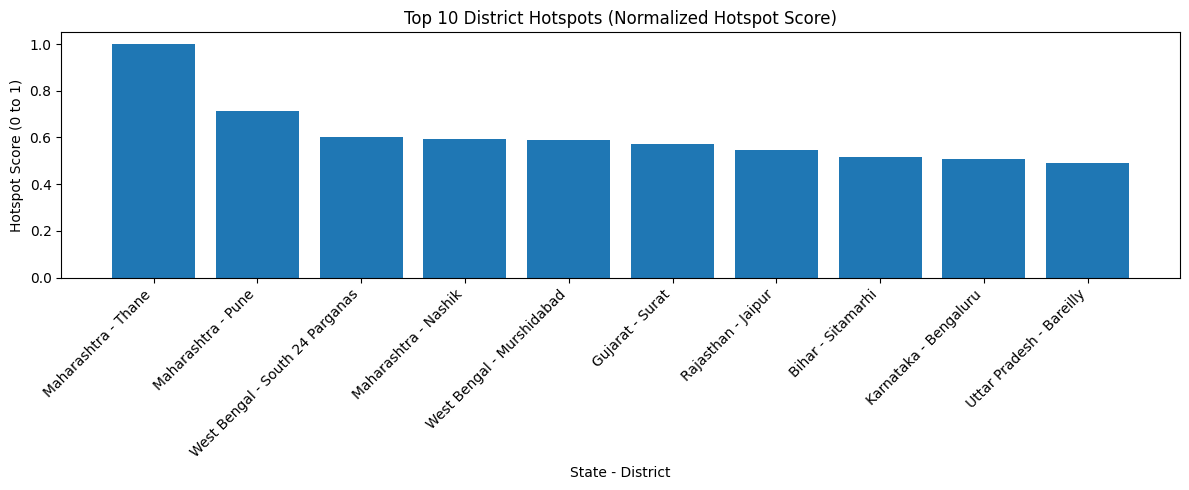

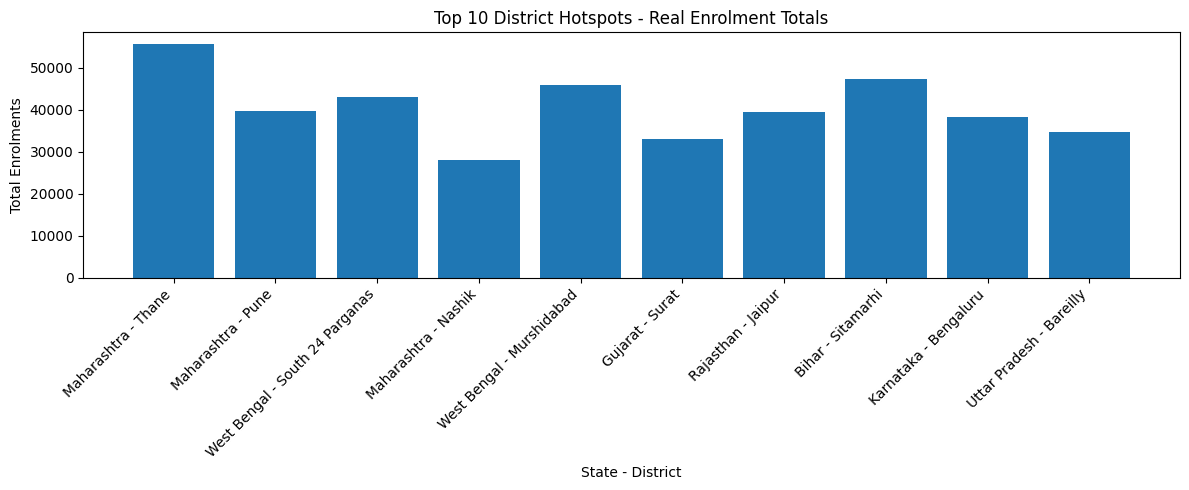

In [82]:
import matplotlib.pyplot as plt

top10_hotspots = district_final.head(10).copy()

plt.figure(figsize=(12,5))
plt.bar(top10_hotspots.index, top10_hotspots["hotspot_score"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 District Hotspots (Normalized Hotspot Score)")
plt.xlabel("State - District")
plt.ylabel("Hotspot Score (0 to 1)")
plt.tight_layout()
plt.show()

# Real totals comparison (Enrolment only)
plt.figure(figsize=(12,5))
plt.bar(top10_hotspots.index, top10_hotspots["enrol_real"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 District Hotspots - Real Enrolment Totals")
plt.xlabel("State - District")
plt.ylabel("Total Enrolments")
plt.tight_layout()
plt.show()


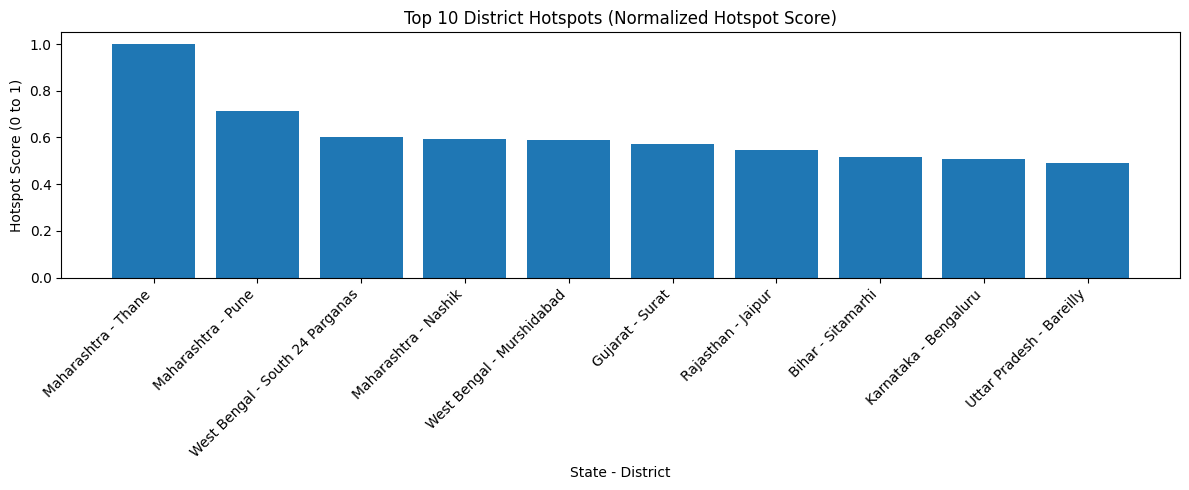

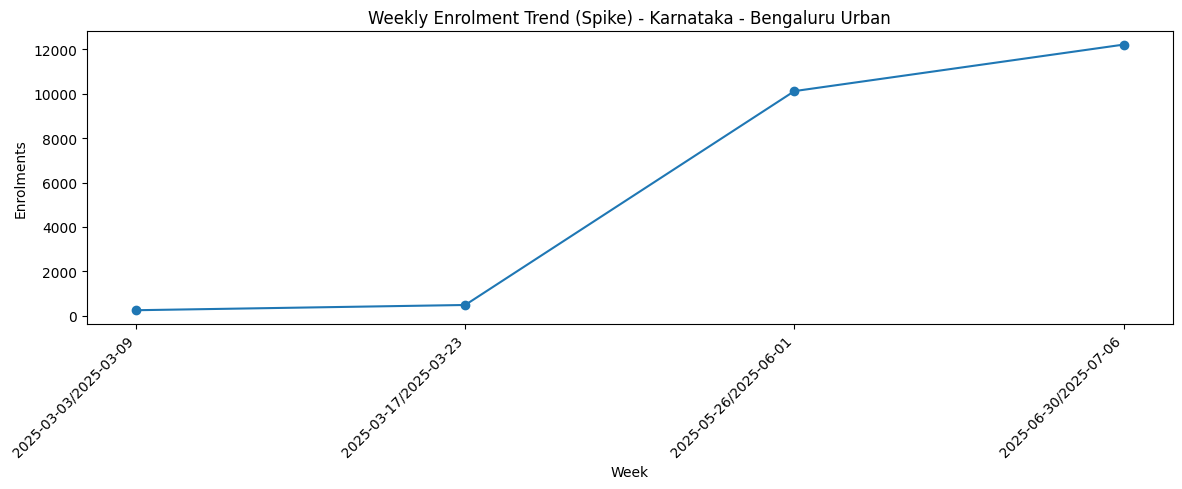

Saved plots inside outputs/ folder ✅
Hotspot Plot: outputs/top10_hotspots_score.png
Spike Plot: outputs/top_spike_week_trend.png


In [84]:
import matplotlib.pyplot as plt

# ----------------------------
# 1) Save Hotspot Plot
# ----------------------------
top10_hotspots = district_final.head(10).copy()

plt.figure(figsize=(12,5))
plt.bar(top10_hotspots.index, top10_hotspots["hotspot_score"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 District Hotspots (Normalized Hotspot Score)")
plt.xlabel("State - District")
plt.ylabel("Hotspot Score (0 to 1)")
plt.tight_layout()
plt.savefig("../outputs/top10_hotspots_score.png")
plt.show()


# ----------------------------
# 2) Save Spike Plot
# ----------------------------
top_spike_row = top_spikes.iloc[0]
district_name = top_spike_row["state_district"]

d = weekly[weekly["state_district"] == district_name].copy()

plt.figure(figsize=(12,5))
plt.plot(d["week"].astype(str), d["enrol_total"], marker="o")
plt.xticks(rotation=45, ha="right")
plt.title(f"Weekly Enrolment Trend (Spike) - {district_name}")
plt.xlabel("Week")
plt.ylabel("Enrolments")
plt.tight_layout()
plt.savefig("../outputs/top_spike_week_trend.png")
plt.show()

print("Saved plots inside outputs/ folder ✅")
print("Hotspot Plot: outputs/top10_hotspots_score.png")
print("Spike Plot: outputs/top_spike_week_trend.png")
